In [1]:
%pip install imblearn
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from imblearn.under_sampling import TomekLinks

Note: you may need to restart the kernel to use updated packages.


In [2]:
parkinsons_data = pd.read_csv(r'C:\Users\Pratham Singh Yadav\OneDrive\Desktop\Outbreak\dataset\parkinsons.csv')

In [3]:
parkinsons_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [35]:
parkinsons_data.shape

(195, 24)

In [5]:
parkinsons_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [6]:
parkinsons_data['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

1-----> Parkinson's Positive

0----->Healthy


<Axes: ylabel='count'>

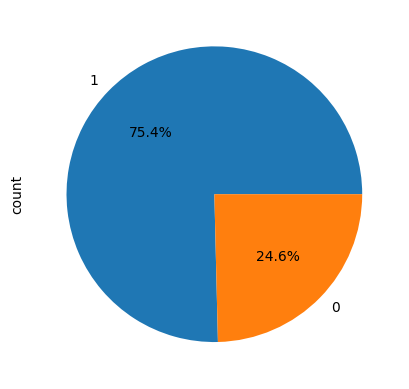

In [7]:
parkinsons_data['status'].value_counts().plot.pie(autopct='%1.1f%%')

In [8]:
tl = TomekLinks(sampling_strategy='majority')

In [9]:
parkinsons_data.groupby('status').mean(numeric_only=True)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


In [10]:
x = parkinsons_data.drop(columns=['name', 'status'], axis=1)
y = parkinsons_data['status']

In [11]:
x_resampled, y_resampled = tl.fit_resample(x, y)

c:\Users\Pratham Singh Yadav\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Pratham Singh Yadav\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\Pratham Singh Yadav\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Pratham Singh Yadav\AppData\Local

In [12]:
x.shape

(195, 22)

In [13]:
y.shape

(195,)

In [14]:
x_resampled.shape

(189, 22)

In [15]:
y_resampled.shape

(189,)

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [17]:
x_train.shape

(156, 22)

In [18]:
x_train.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
123,182.018,197.173,79.187,0.00842,0.00005,0.00506,0.00449,0.01517,0.02503,0.231,...,0.01931,0.04115,0.01813,18.784,0.589956,0.732903,-5.445140,0.142466,2.174306,0.215558
160,114.238,124.393,77.022,0.00581,0.00005,0.00299,0.00316,0.00896,0.04009,0.406,...,0.04114,0.04736,0.02073,20.437,0.653139,0.694571,-5.185987,0.259229,2.151121,0.244948
94,157.821,172.975,68.401,0.00358,0.00002,0.00196,0.00196,0.00587,0.03716,0.307,...,0.02764,0.06185,0.00850,22.219,0.502380,0.712170,-6.251425,0.188056,2.143851,0.160812
57,117.274,129.916,110.402,0.00752,0.00006,0.00299,0.00469,0.00898,0.02293,0.221,...,0.01948,0.03568,0.00681,22.817,0.530529,0.817756,-4.608260,0.290024,2.021591,0.314464
41,184.055,196.537,166.977,0.00258,0.00001,0.00134,0.00147,0.00403,0.01463,0.132,...,0.01234,0.02226,0.00257,26.453,0.306443,0.759203,-7.044105,0.063412,2.361532,0.115730


In [19]:
model = svm.SVC(kernel='linear')

In [20]:
model.fit(x_train, y_train)

SVC(kernel='linear')

In [21]:
y_predc = model.predict(x_test)

In [22]:
print('accuracy score', accuracy_score(y_test, y_predc))

accuracy score 0.8717948717948718


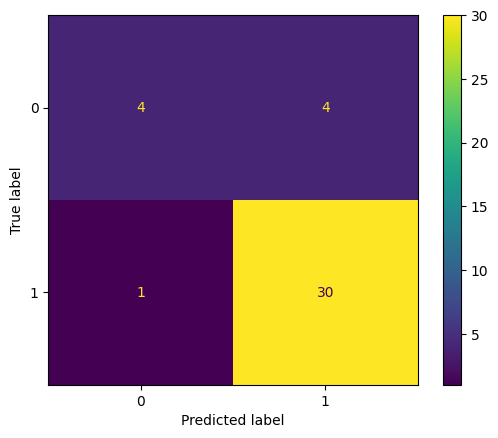

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, x_test, y_test)

In [24]:
from sklearn.metrics import recall_score, confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [25]:
Recall = recall_score(y_test, y_predc)
Precision = precision_score(y_test, y_predc)
F1 = f1_score(y_test, y_predc)
Confusion_matrix = confusion_matrix(y_test, y_predc)
print('Recall:', Recall)
print('Precision:', Precision)
print('F1:', F1)
print('Confusion_matrix:', Confusion_matrix)

Recall: 0.967741935483871
Precision: 0.8823529411764706
F1: 0.9230769230769231
Confusion_matrix: [[ 4  4]
 [ 1 30]]


In [26]:
x_resampled_train, x_resampled_test, y_resampled_train, y_resampled_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=2)

In [27]:
model_resampled = svm.SVC(kernel='linear')

In [28]:
y_resampled_pred  = model_resampled.fit(x_resampled_train, y_resampled_train)

In [29]:
y_resampled_pred = model_resampled.predict(x_resampled_test)

Accuracy = accuracy_score(y_resampled_test, y_resampled_pred)
Recall = recall_score(y_resampled_test, y_resampled_pred)
Precision = precision_score(y_resampled_test, y_resampled_pred)
F1 = f1_score(y_resampled_test, y_resampled_pred)
Confusion_matrix = confusion_matrix(y_resampled_test, y_resampled_pred)
print('Accuracy:', Accuracy)
print('Recall:', Recall)
print('Precision:', Precision)
print('F1:', F1)
print('Confusion_matrix:\n', Confusion_matrix)

Accuracy: 0.9473684210526315
Recall: 1.0
Precision: 0.9375
F1: 0.967741935483871
Confusion_matrix:
 [[ 6  2]
 [ 0 30]]


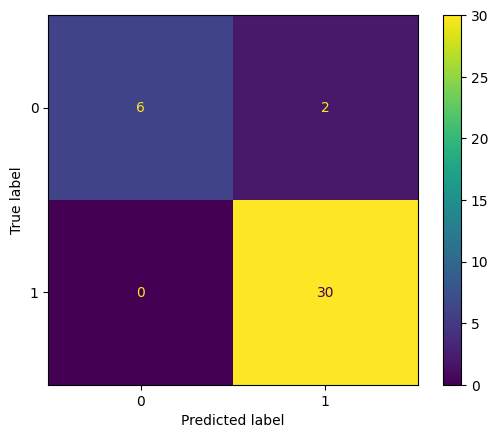

In [30]:
ConfusionMatrixDisplay.from_estimator(model_resampled, x_resampled_test, y_resampled_test)

In [31]:
import pickle
import os
filename =os.path.join(r"C:\Users\Pratham Singh Yadav\OneDrive\Desktop\Outbreak\Save_model" ,"parkinson's_model.sav")
pickle.dump(model_resampled, open(filename, 'wb'))